In [1]:
import cv2 as cv
import glob
import json
from matplotlib import pyplot as plt

In [2]:
def kantu(image_path,ture_boxes_txt_path,detect_boxes_txt_path):
    img = cv.imread(image_path)
    
    f1 = open(ture_boxes_txt_path)             # 返回一个文件对象   
    line = f1.readline()             # 调用文件的 readline()方法   
    while line:   
        #print line, # 在 Python 2中，后面跟 ',' 将忽略换行符   
        a=line.split(" ")
        x1,y1,x2,y2=int(float(a[1])),int(float(a[2])),int(float(a[3])),int(float(a[4][:-2]))
        cv.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 255, 255), thickness=2)
        # 在 Python 3中使用 
        line = f1.readline() 
    f1.close()
    
    f2 = open(detect_boxes_txt_path)             # 返回一个文件对象   
    line = f2.readline()             # 调用文件的 readline()方法   
    while line:   
        a=line.split(" ")
        x1,y1,x2,y2=int(float(a[2])),int(float(a[3])),int(float(a[4])),int(float(a[5][:-2]))
        cv.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), thickness=2)
        line = f2.readline() 
    f2.close()
    plt.imshow(img)

In [3]:
images_path = sorted(glob.glob('output/metric/ssd/images_optional'+'/*.*'))

In [4]:
print(images_path[:2])

['output/metric/ssd/images_optional/0004974f-05e1c285.jpg', 'output/metric/ssd/images_optional/0075a5b0-9a8d5dbb.jpg']


In [21]:
image_path=images_path[4]
name=image_path.split("/")[-1][:-4]
ture_boxes_txt_path='output/metric/ssd/ground_truth/%s.txt'%name
detect_boxes_txt_path='output/metric/ssd/detection_results/%s.txt'%name

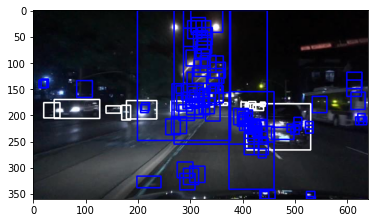

In [22]:
kantu(image_path,ture_boxes_txt_path,detect_boxes_txt_path)

In [25]:
images_path = sorted(glob.glob('output/images/cycleGAN/1_720_1280_1/fake_B'+'/*.*'))
with open("data/labels/test/clear.json", 'r') as f:
    lab = json.load(f)

In [26]:
def kk(image_path,boxes):
    img = cv.imread(image_path)
    for box in boxes:
        cv.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 255, 255), thickness=2)
    plt.imshow(img)

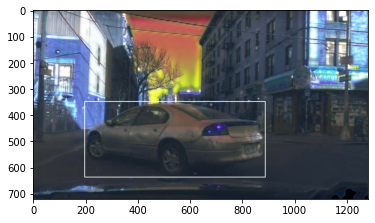

In [31]:
image_path=images_path[40]
name=image_path.split("/")[-1][:-4]
boxes=lab[name]["boxes"]
kk(image_path,boxes)